In [1]:
#this defaults plots to matplotlib 1.0 formatting
import matplotlib.style
import matplotlib as mpl
#mpl.style.use('classic')
%matplotlib inline
mpl.rcParams['figure.dpi']= 150

# importing packages needed to run this script 
from subprocess import call
import pickle as pickle
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as sch

import os
import time
import matplotlib.pyplot as plt
import numpy as np
import copy
import colorsys
import matplotlib.image as mpimg
from IPython.display import display
from IPython.display import Image
import scipy.cluster.hierarchy as sch
from scipy.stats import scoreatpercentile 
from ...pysca import scaTools as sca
# import mpld3
import pickle as pickle
from optparse import OptionParser

%matplotlib inline

if not os.path.exists('../output/'):
    os.makedirs('../output/')  

ImportError: attempted relative import with no known parent package

In [2]:
#Run utilities/file_parser.py on the blast file to generate the sequence of ids

In [16]:
# list of id numbers in ubiad1_blastmsa.aln

f = open('../data/ubiad1_blastmsa.aln','r')

ids = []
for line in f.readlines():
    
    if line[0] == '>':
        
        sp_line = line.split('  ')
        
        ids.append(sp_line[0].split('|')[1])
        
f.close()

f = open('../data/ubiad1_blastmsa_ids.txt.txt','w')
for l in ids:
    f.write(l+'\n')
    
f.close()

amino acid sequence of UBIAD1
MAASQVLGEKINILSGETVKAGDRDPLGNDCPEQDRLPQRSWRQKCASYVLALRPWSFSASLTPVALGSALAYRSHGVLDPRLLVGCAVAVLAVHGAGNLVNTYYDFSKGIDHKKSDDRTLVDRILEPQDVVRFGVFLYTLGCVCAACLYYLSPLKLEHLALIYFGGLSGSFLYTGGIGFKYVALGDLIILITFGPLAVMFAYAIQVGSLAIFPLVYAIPLALSTEAILHSNNTRDMESDREAGIVTLAILIGPTFSYILYNTLLFLPYLVFSILATHCTISLALPLLTIPMAFSLERQFRSQAFNKLPQRTAKLNLLLGLFYVFGIILAPAGSLPKI

In [40]:
path2data = '/home/bjohnson/pySCA-master/data/ubiad1msa100.aln' 
path2output = '/home/bjohnson/pySCA-master/output/ubia1_bj_211212.an'
gis = '/home/bjohnson/pySCA-master/data/ubiad1_blastmsa_ids.txt'
print('python annotateMSA -i %s -o %s -l %s -a %s' % (path2data, path2output,gis, "'ncbi'"))

python annotateMSA -i /home/bjohnson/pySCA-master/data/ubiad1msa100.aln -o /home/bjohnson/pySCA-master/output/ubia1_bj_211212.an -l /home/bjohnson/pySCA-master/data/ubiad1_blastmsa_ids.txt -a 'ncbi'


When analyzing the NCBI alignment of DHFR, one of the import arguments was a list of ID numbers (one for each DHFR sequence in DHFR_PEPM3.fasta). The name of this file is DHFR_PEPM3.gis. The purpose of these ID numbers is so that the annotateMSA.py script can query the species information about the sequence. What you will need to do is to create an analagous file for ubia1_bj_211212.txt. How this will work is that you will read this alignment, parse the header for the id number (XP_012329129.1), and then write it to the gis file. It should be the same length as the total number of sequences and the id numbers should be in the same exact order as in the original alignment file. 

### Running scaProcessMSA on annotated MSA of UBIAD1

In [12]:
# this does not work 
path2aln_processed = '/home/bjohnson/pySCA-master/data/ubiad1msa100.aln'
refseq = '/home/bjohnson/pySCA-master/data/ubiad1.fasta'
pdb_id='4TQ6'
path2out = '/home/bjohnson/pySCA-master/output/'

#rint('python scaProcessMSA -a %s -d %s -s %s -c A' %(path2aln_processed,path2out,pdb_id))

# -a takes output of annotateMSA, path2aln_processed
# -d is where you want the result of scaProcessMSA to put a processed alignment
# -s is the 4 character PDB ID
# -b is path 2 pdb file


In [41]:
## this works

# we keep getting a "something wrong with pdb file or pdb file path so let's try a reference sequence. 
#Inputting the actual reference sequence (ubiad1.fasta) did not work because ...
# the length of this sequence does not match the length of the sequences in ubiad1_blastmsa.aln
# Instead, I used the --iref input argument. this specifies which sequence WITHIN the alignment you want to 

print ('python scaProcessMSA -a %s -d %s -i 0' % (path2aln_processed, path2out))

python scaProcessMSA -a /home/bjohnson/pySCA-master/data/ubiad1msa100.aln -d /home/bjohnson/pySCA-master/output/ -i 0


### command line output of scaProcessMSA

### Running SCA core on annotated MSA of UBIAD1

In [42]:
path2db='/home/bjohnson/pySCA-master/output/ubiad1msa100.db'

print('python scaCore -i %s' %(path2db))


python scaCore -i /home/bjohnson/pySCA-master/output/ubiad1msa100.db


### commmand line output of scaCORE

In [43]:
Dseq = list(); Dsca = list(); Dsect = list()
db = pickle.load(open('../output/ubiad1_blastmsa.db','rb'))
Dseq.append(db['sequence'])
Dsca.append(db['sca'])
# Dsect.append(db['sector'])
N_alg = 2
AlgName = ['PFAM', 'Manual']
db.keys()

dict_keys(['sequence', 'sca'])

In [52]:
# print( 'The number of effective sequences in this MSA is: '+str(int(round(Dseq['effseqs']))))
print(db['sequence'].keys())
if db['sequence']['effseqs'] >= 100:
    print ('This alignment has a sufficient number of effective sequences for analysis with SCA.')
else:
    print('This alignment does not have enough effective sequences to confidently analyze with SCA.')
    
print ('Npos (L) = '+ str(db['sequence']['Npos'])) 

dict_keys(['alg', 'hd', 'msa_num', 'seqw', 'Nseq', 'Npos', 'ats', 'effseqs', 'limitseqs', 'NseqPrelimit', 'effseqsPrelimit', 'i_ref', 'trim_parameters', 'truncate_flag'])
This alignment does not have enough effective sequences to confidently analyze with SCA.
Npos (L) = 337


In [31]:
print( 'The number of effective sequences in this MSA is: '+str(int(round(Dseq['effseqs']))))

if int(Dseq['effseqs']) >= 100:
    print ('This alignment has a sufficient number of effective sequences for analysis with SCA.')
else:
    print('This alignment does not have enough effective sequences to confidently analyze with SCA.')
    
print ('Npos (L) = '+ str(Dseq['Npos'])) 

TypeError: list indices must be integers or slices, not str

IndexError: list index out of range

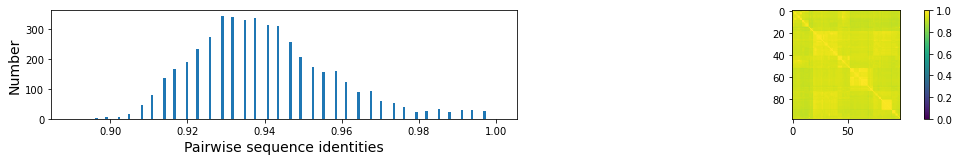

In [32]:
ix = 1
plt.rcParams['figure.figsize'] = 9, 15
for k in range(N_alg):
    # List all elements above the diagonal (i<j):
    listS = [Dsca[k]['simMat'][i,j] for i in range(Dsca[k]['simMat'].shape[0]) \
             for j in range(i+1, Dsca[k]['simMat'].shape[1])]
    
    #Cluster the sequence similarity matrix
    Z = sch.linkage(Dsca[k]['simMat'],method = 'complete', metric = 'cityblock')
    R = sch.dendrogram(Z,no_plot = True)
    ind = R['leaves']
    
    #Plotting
    plt.rcParams['figure.figsize'] = 14, 4 
    plt.subplot(2,2,ix)
    ix += 1
    plt.hist(listS, int(round(Dseq[k]['Npos']/2)))
    plt.xlabel('Pairwise sequence identities', fontsize=14)
    plt.ylabel('Number', fontsize=14)
    plt.subplot(2,2,ix)
    ix += 1
    plt.imshow(Dsca[k]['simMat'][np.ix_(ind,ind)], vmin=0, vmax=1); plt.colorbar();   
    plt.tight_layout()